In [33]:
###
## David Pazmino
##  To do - create main, format as script.
##  Merge plots to one plot.
##  Create number 3


### I know someone will mention why I did not use text analytics and do stop words or more work on text manipulation.
### In this case, it was not necessary since I am concerned with just the top 10.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [34]:
original_df = pd.read_csv("E:/enron-event-history-all.csv", header=None, names=["time","message", "sender", "recipients","topic", "mode"])

In [35]:
original_df.head()

,time,message,sender,recipients,topic,mode
0,896308260000,<GKNWYZTKAVMKBCTMA3ZZSQIBITG5OD1KA@zlsvr22>,Christopher Behney,Toni P Schulenburg|mary hain,NaN,email
1,909790980000,<N5QXQ4CHS04FBSJO3TALWRBXATDTIWZ0B@zlsvr22>,mark legal taylor,Marc.R.Cutler@BankAmerica.com,NaN,email
2,909791760000,<FEJ0YLF5MHTTF2QHNWMRUODCCHDCPUA5A@zlsvr22>,mark legal taylor,Marc.R.Cutler@BankAmerica.com,NaN,email
3,909792120000,<NFC21LWTHYCKD4JV1IQMLSQ4JX2WY1JCB@zlsvr22>,mark legal taylor,shari stack,NaN,email
4,909795960000,<LAGJQ1MQZ2HX3APYD2TBODXUA4XF04UOA@zlsvr22>,mark legal taylor,Marc.R.Cutler@BankAmerica.com,NaN,email


In [36]:
type(original_df)

pandas.core.frame.DataFrame

In [37]:
new_df = original_df.drop(['message', 'topic', 'mode'], axis = 1)

In [38]:
new_df.head()

,time,sender,recipients
0,896308260000,Christopher Behney,Toni P Schulenburg|mary hain
1,909790980000,mark legal taylor,Marc.R.Cutler@BankAmerica.com
2,909791760000,mark legal taylor,Marc.R.Cutler@BankAmerica.com
3,909792120000,mark legal taylor,shari stack
4,909795960000,mark legal taylor,Marc.R.Cutler@BankAmerica.com


In [39]:
split_to_row = new_df['recipients'].str.split('|').apply(pd.Series, 1).stack()
split_to_row.index = split_to_row.index.droplevel(-1) 
split_to_row.name = 'recipients'

del new_df['recipients']

split_new_df = new_df.join(split_to_row)

In [40]:
split_new_df = split_new_df.drop(['time'], axis = 1)

In [41]:
split_new_df['sender'] = split_new_df['sender'].str.strip()

split_new_df['recipients'] = split_new_df['recipients'].str.strip()

In [42]:
sender_df = split_new_df.groupby(['sender'], as_index=False).count()
recipient_df = split_new_df.groupby(['recipients'], as_index=False).count()
sender_df.columns = ['person', 'sent']
recipient_df.columns = ['person', 'received']

In [43]:
sender_df.head()

,person,sent
0,"""Association.of.Pat""@aplf.org]",1
1,"""Merriam-Webster's Word of the Day"" <MW-WOD@LI...",55
2,"""specialistdirectories@euromoneyplc.com"" <spec...",1
3,*MISC Exchange Customer Activities\tcustomerac...,1
4,.,5


In [44]:
#This will be the csv to output
new_merge = pd.merge(sender_df, recipient_df, on='person')
new_merge.sort_values(['sent'], ascending=False)

,person,sent,received
5589,pete davis,15440,853
3064,jeff dasovich,11607,2249
1120,chris germany,8622,1591
6296,sara shackleton,7901,5217
2897,james steffes,5234,2799
7336,vince kaminski,4403,3046
2439,gerald nemec,4372,3301
5352,notes,4166,1023
4767,matthew lenhart,3845,448
5016,michelle cash,3689,1119


In [45]:
#We only want to do 10 people otherwise graphs will not make sense
#We don't want notes as sender.
top_10_senders = new_merge.sort_values(['sent'], ascending=False)['person'].head(10)
top_10_senders.head()

5589         pete davis
3064      jeff dasovich
1120      chris germany
6296    sara shackleton
2897      james steffes
Name: person, dtype: object

In [46]:
sender_df_time = new_df[new_df['sender'].isin(top_10_senders)]
sender_df_time = sender_df_time[sender_df_time['sender'] != 'notes']
sender_df_time.head()

,time,sender
74,914275740000,michelle cash
291,926351820000,sara shackleton
292,926352300000,sara shackleton
293,926352360000,sara shackleton
296,926353740000,sara shackleton


In [47]:
#need to add time back in
new_time  = pd.to_datetime(sender_df_time['time'],unit='ms')
new_time.name = 'time'
del sender_df_time['time']
sender_df_time = sender_df_time.join(new_time)
sender_df_time.set_index('time', inplace=True)

In [48]:
#let's resample by Quarter.  
new_df = sender_df_time.groupby(sender_df_time['sender'], as_index=True).resample('Q').count()
new_df.columns=['counts']
new_df.reset_index(inplace=True)  

second_df = new_df.pivot(index="time", columns="sender", values = "counts")
second_df = second_df.fillna(0)
second_df = second_df.astype(int)
second_df

sender,chris germany,gerald nemec,james steffes,jeff dasovich,matthew lenhart,michelle cash,pete davis,sara shackleton,vince kaminski
time,,,,,,,,,
1998-12-31,0,0,0,0,0,1,0,0,0
1999-03-31,0,0,0,0,0,0,0,0,0
1999-06-30,0,84,0,0,0,0,0,115,0
1999-09-30,2,145,0,0,1,0,0,337,0
1999-12-31,91,136,1,1,0,2,0,318,41
2000-03-31,481,152,1,1,3,43,0,381,462
2000-06-30,397,189,1,3,128,187,0,508,515
2000-09-30,325,191,5,435,541,96,0,485,477
2000-12-31,410,210,9,996,424,240,0,534,506


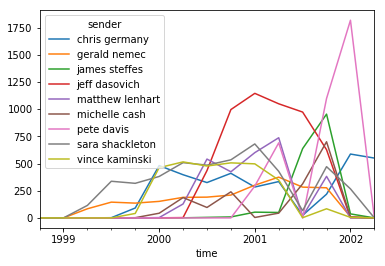

In [49]:
#graph of everyone.
second_df.plot()
plt.show()

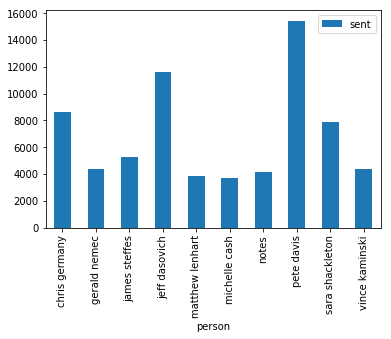

In [50]:
#other plot to see who is the worst.
new_merge_count = new_merge[new_merge['person'].isin(top_10_senders)]
new_merge_count = new_merge_count.drop(['received'], axis = 1)
new_merge_count.set_index('person', inplace=True)
new_merge_count.plot(kind='bar')
plt.show()

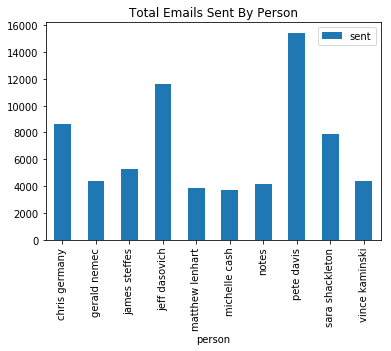

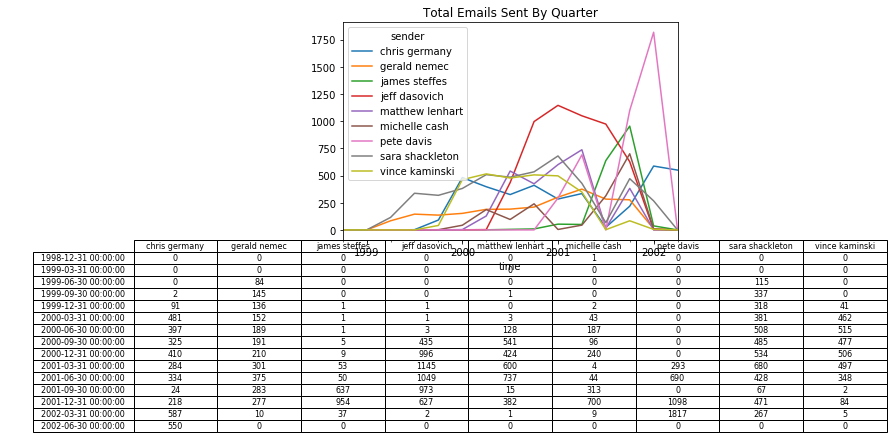

In [65]:
#driving me crazy. need to make this one png.
from pandas.tools.plotting import table

new_merge_count.plot(kind='bar')
plt.title("Total Emails Sent By Person")

second_df.plot()
plt.title("Total Emails Sent By Quarter")

plt.table(cellText=second_df.values,colWidths = [0.25]*len(second_df.columns),
          rowLabels=second_df.index,
          colLabels=second_df.columns,
          cellLoc = 'center', rowLoc = 'center',
          loc='bottom')

plt.show()
#fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 6))
#new_merge_count.plot(kind='bar', ax=axes[0] )

#second_df.plot(ax=axes[1])
#ax = plt.subplot(111, frame_on=False) # no visible frame


#table(ax, df)  # where df is your data frame
#from matplotlib.pyplot import figure
#figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
#fig.savefig('E:/mytable.png', dpi=500)

